# Introduction to matplotlib

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pandas
import numpy as np

[]

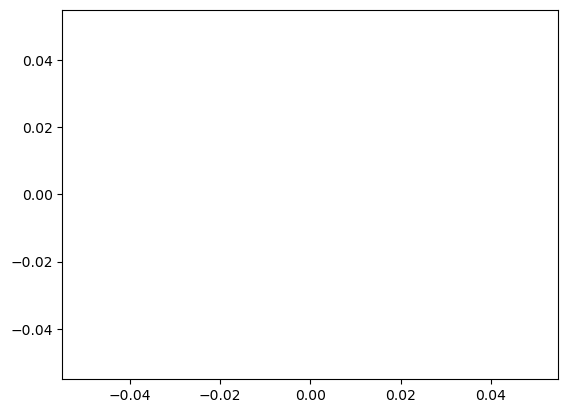

In [4]:
plt.plot()

[]

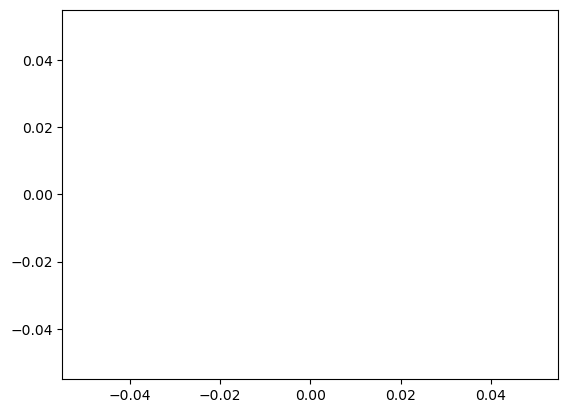

In [5]:
plt.plot()

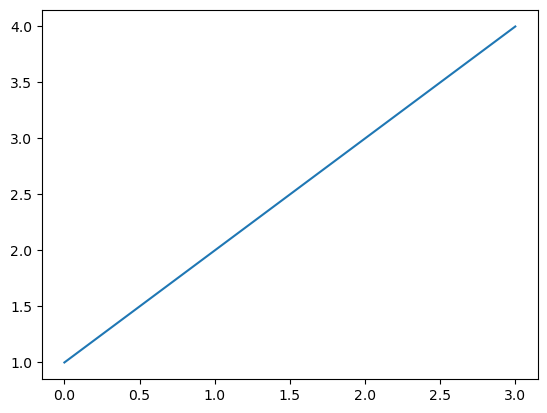

In [6]:
plt.plot([1,2,3,4])

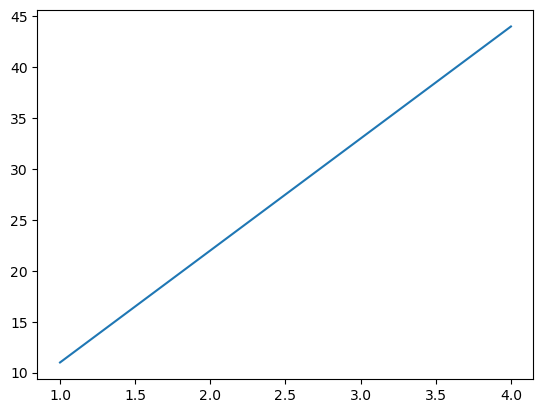

In [7]:
x = [1,2,3,4]
y = [11,22,33,44]
plt.plot(x,y)

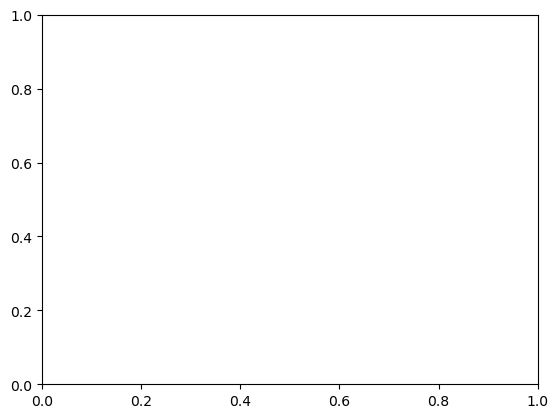

In [8]:
# 1st method
fig = plt.figure() # creates a figure
ax = fig.add_subplot() # adds some axes
plt.show()

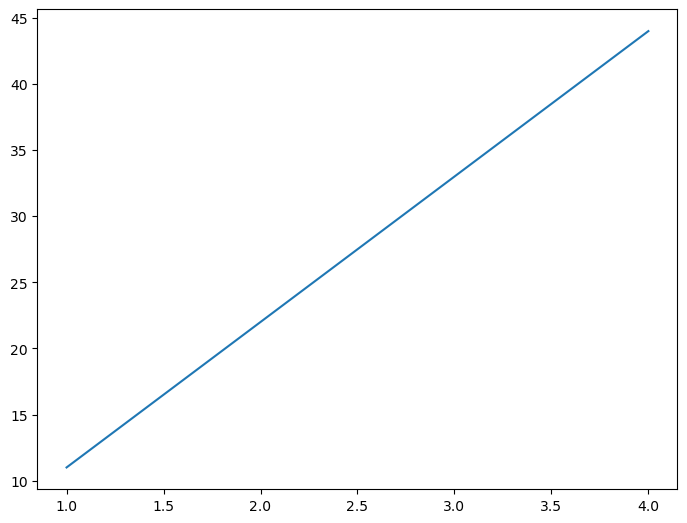

In [9]:
# 2nd method
fig = plt.figure() # creates a figure
ax = fig.add_axes([1,1,1,1])
ax.plot(x,y) # add some data
plt.show()

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

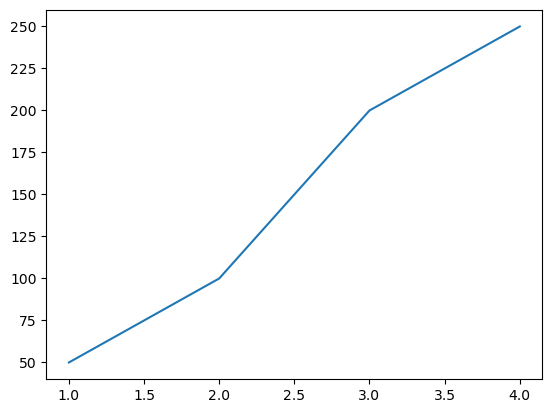

In [10]:
# 3rd method (recommended)
fig, ax = plt.subplots()
ax.plot(x,[50,100,200,250]) # add some data
type(fig), type(ax)
# plt.show()

# Matplotlib example workflow

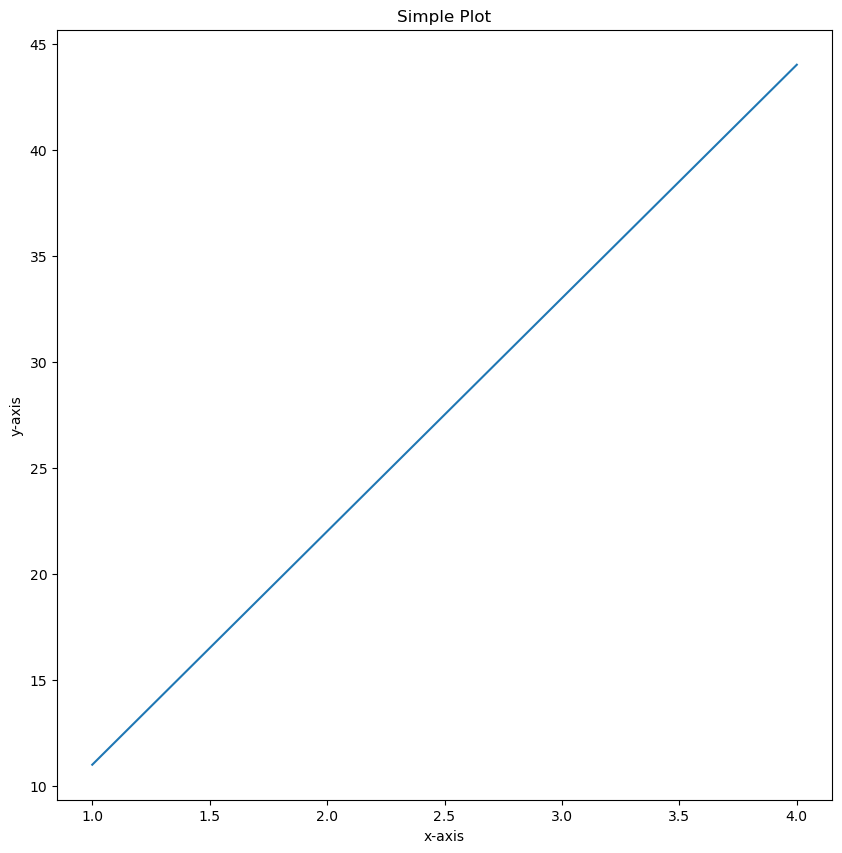

In [11]:
# 0. Import matplotlib and get it ready for plotting in Jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1,2,3,4]
y = [11,22,33,44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10,10)) # (width, height)

# 3. Plot data
ax.plot(x,y)

# 4. Customize plot
ax.set(title="Simple Plot",
      xlabel="x-axis",
      ylabel="y-axis")

# 5. Save & show (you save the whole figure)
fig.savefig("images/sample-plot.png")

## Making figures with NumPy arrays

We want:
* Line plot
* Scanner plot
* Bar plot
* Histogram
* Subplots

In [12]:
import numpy as np

In [13]:
# Create some data
x = np.linspace(0,10,100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

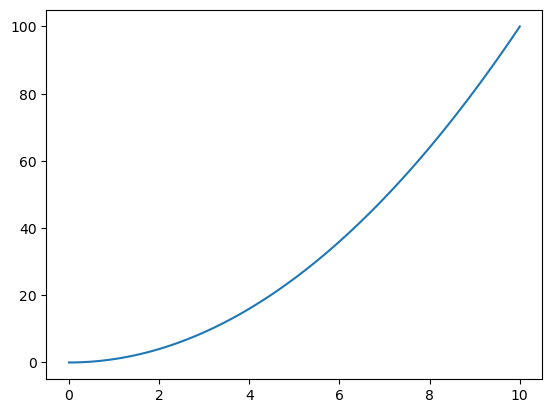

In [14]:
# Plot the data and create a line plot
fig, ax = plt.subplots()
ax.plot(x, x**2);

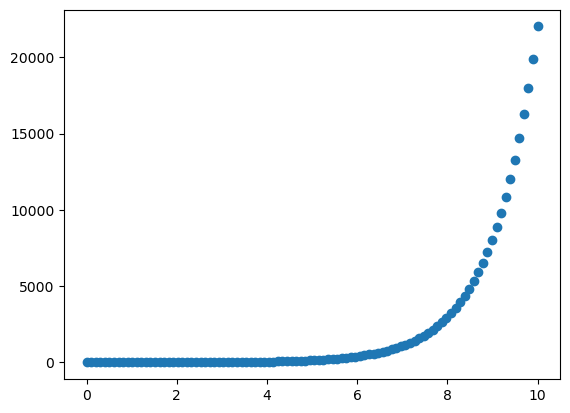

In [15]:
# Use the same data to make a scatter
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

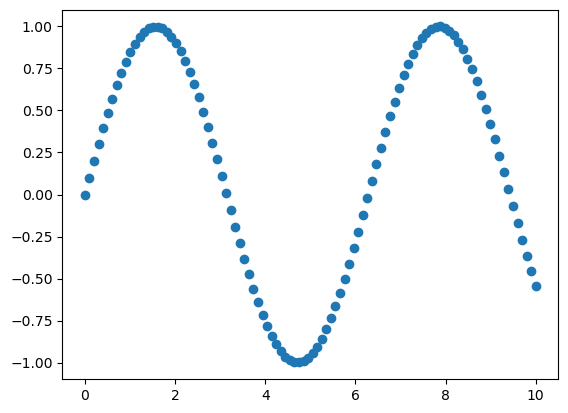

In [16]:
# Another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

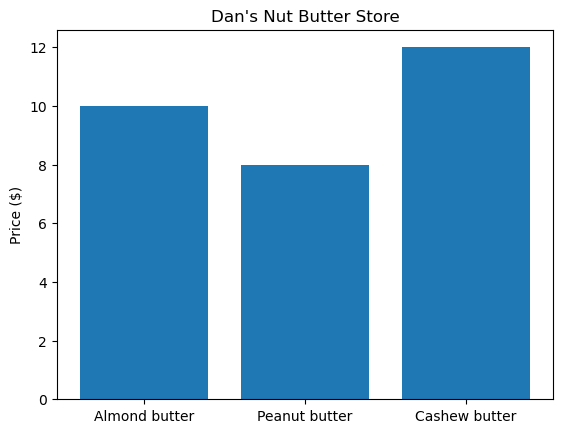

In [18]:
# Make a plot from dictionary
nut_butter_prices = {"Almond butter": 10,
                    "Peanut butter": 8,
                    "Cashew butter": 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="Dan's Nut Butter Store",
      ylabel="Price ($)");

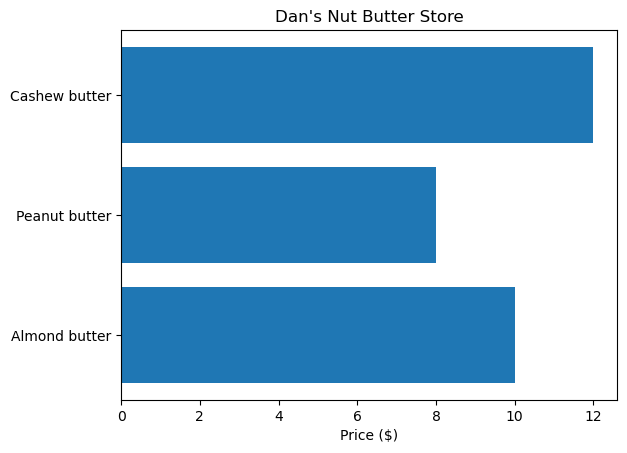

In [19]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()))
ax.set(title="Dan's Nut Butter Store",
      xlabel="Price ($)");


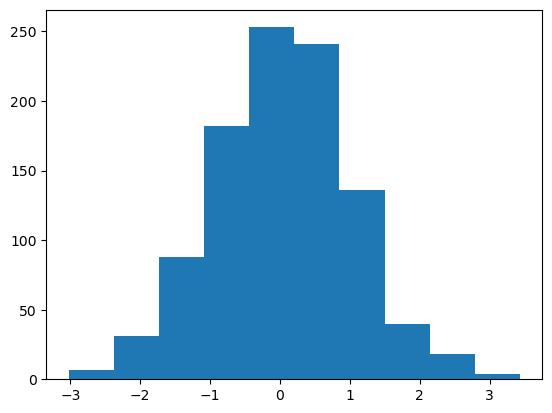

In [25]:
# Make some data for histogram and plot it
x = np.random.randn(1000)
fig,ax = plt.subplots()
ax.hist(x);

# Two options for subplots

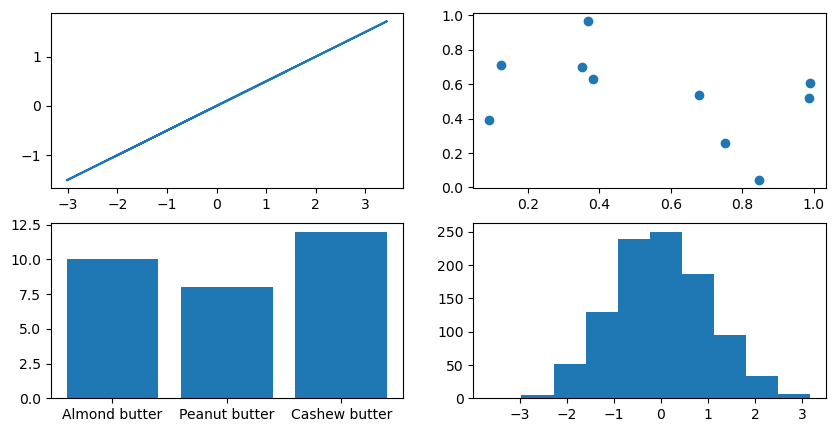

In [29]:
# Subplots option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                            ncols=2,
                                            figsize=(10,5))

# Plot to each different axis
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

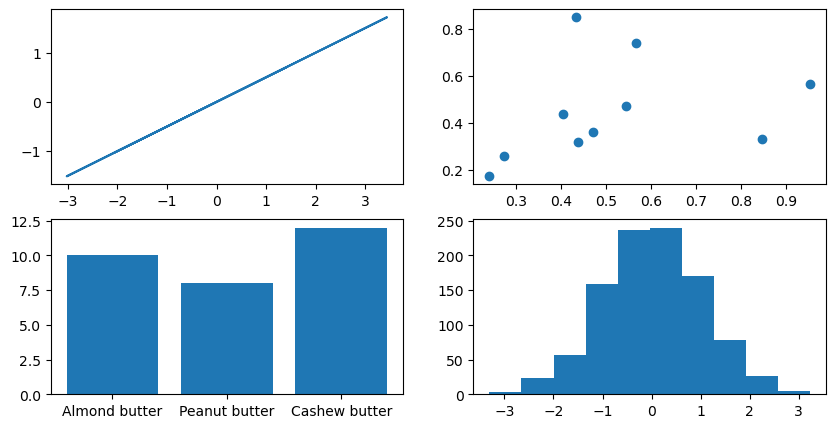

In [30]:
# Subplots option 2
fig, ax = plt.subplots(nrows=2,
                      ncols=2,
                      figsize=(10,5))

# Plot to each different index
ax[0,0].plot(x, x/2);
ax[0,1].scatter(np.random.random(10), np.random.random(10));
ax[1,0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1,1].hist(np.random.randn(1000));

## Plotting from pandas DataFrames

In [31]:
import pandas as pd

In [32]:
# Make a dataframe
car_sales = pd.read_csv("car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


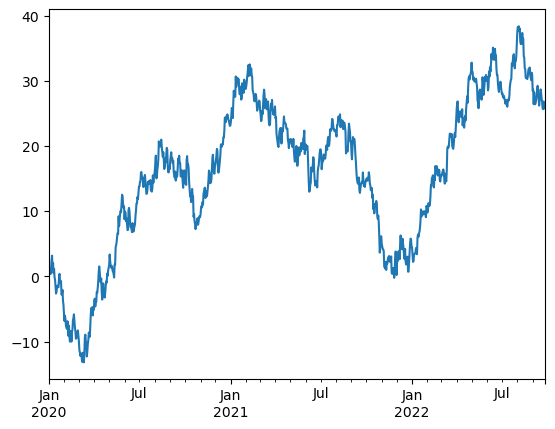

In [36]:
ts = pd.Series(np.random.randn(1000),
                index=pd.date_range("1/1/2020", periods=1000))
ts = ts.cumsum()
ts.plot();

In [37]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [43]:
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '', regex=True)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [44]:
# Remove last two zeros
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [45]:
car_sales["Sale Date"] = pd.date_range("1/1/2020", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [46]:
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


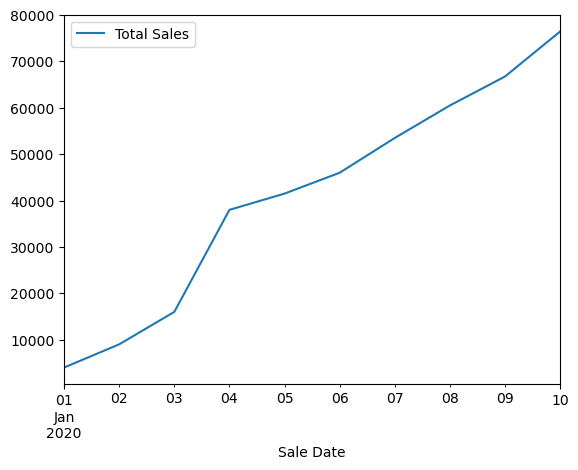

In [47]:
# Let's plot the total sales
car_sales.plot(x="Sale Date", y="Total Sales");

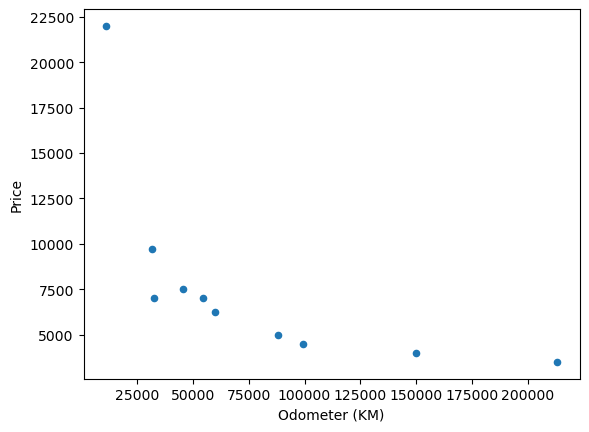

In [51]:
# Reassign price column to int
car_sales["Price"] = car_sales["Price"].astype(int)

# Plot scatter plot with price column as numeric
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

In [52]:
# How about a bar graph?
x = np.random.rand(10,4)
x

# Turn it into a dataframe
df = pd.DataFrame(x, columns=["a","b","c","d"])
df

,a,b,c,d
0,0.554079,0.729374,0.415338,0.732530
1,0.522533,0.187055,0.303922,0.501827
2,0.891389,0.152942,0.946396,0.323994
3,0.324503,0.091794,0.749902,0.192216
4,0.876364,0.641789,0.766258,0.575516
5,0.552325,0.623351,0.667742,0.519538
6,0.018564,0.800876,0.964996,0.099413
7,0.230469,0.952529,0.073288,0.376159
8,0.553846,0.440846,0.554449,0.057132
9,0.081865,0.156236,0.978743,0.630784


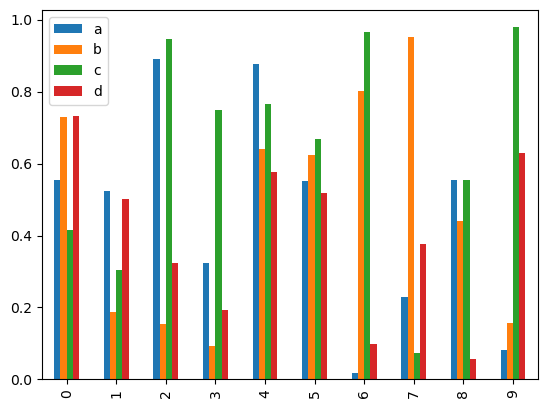

In [53]:
df.plot.bar();

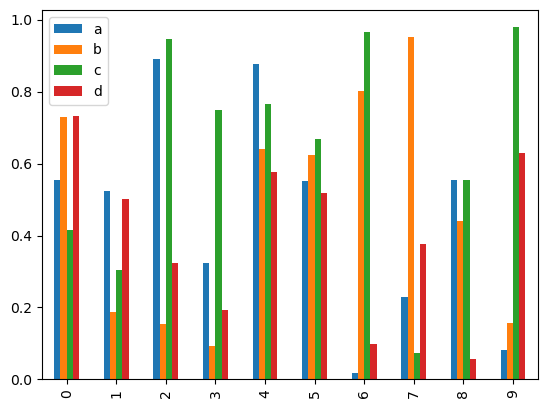

In [54]:
df.plot(kind="bar");

In [55]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


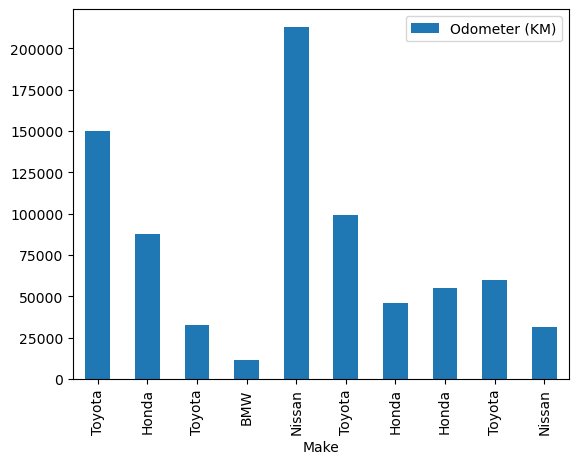

In [56]:
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar");

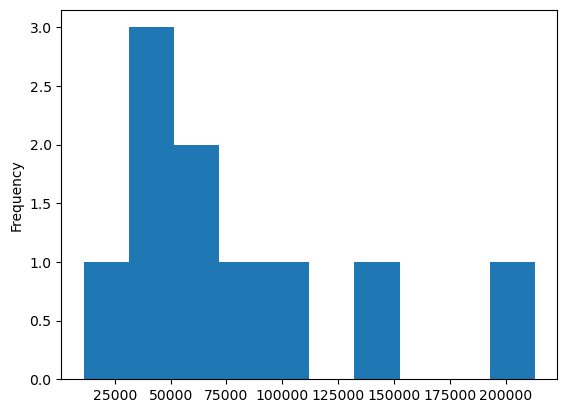

In [57]:
# How about histograms?
car_sales["Odometer (KM)"].plot.hist();

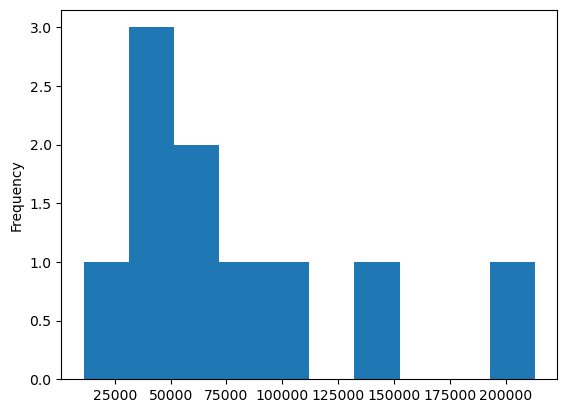

In [58]:
car_sales["Odometer (KM)"].plot(kind="hist");

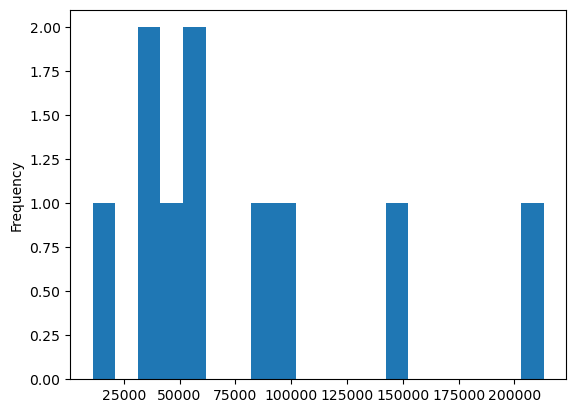

In [59]:
car_sales["Odometer (KM)"].plot.hist(bins=20);

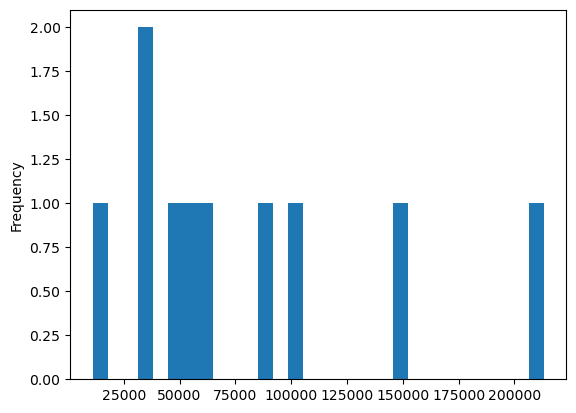

In [60]:
car_sales["Odometer (KM)"].plot.hist(bins=30);

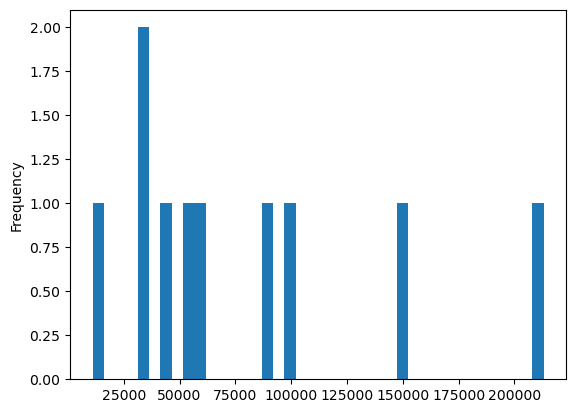

In [61]:
car_sales["Odometer (KM)"].plot.hist(bins=40);

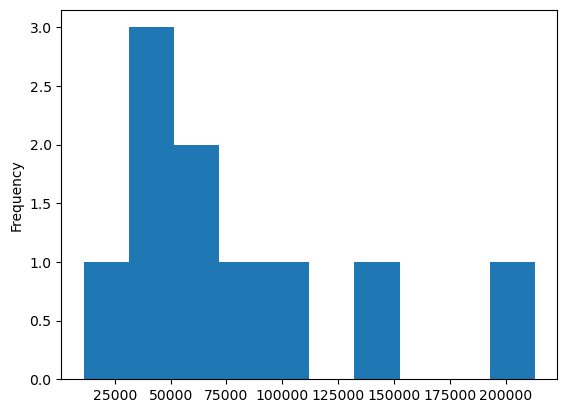

In [62]:
car_sales["Odometer (KM)"].plot.hist(bins=10);

In [63]:
# Let's try on another dataset
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: ylabel='Frequency'>

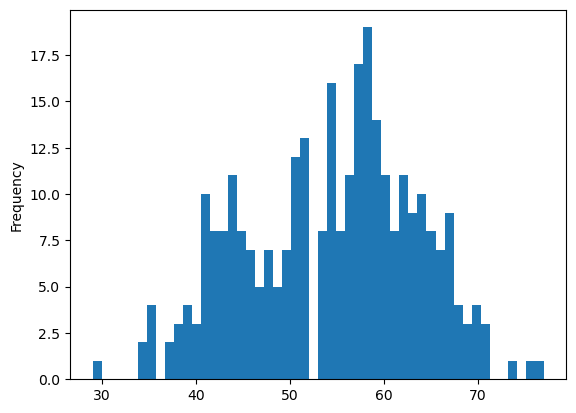

In [66]:
# Create histogram of age
heart_disease["age"].plot.hist(bins=50)

In [67]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


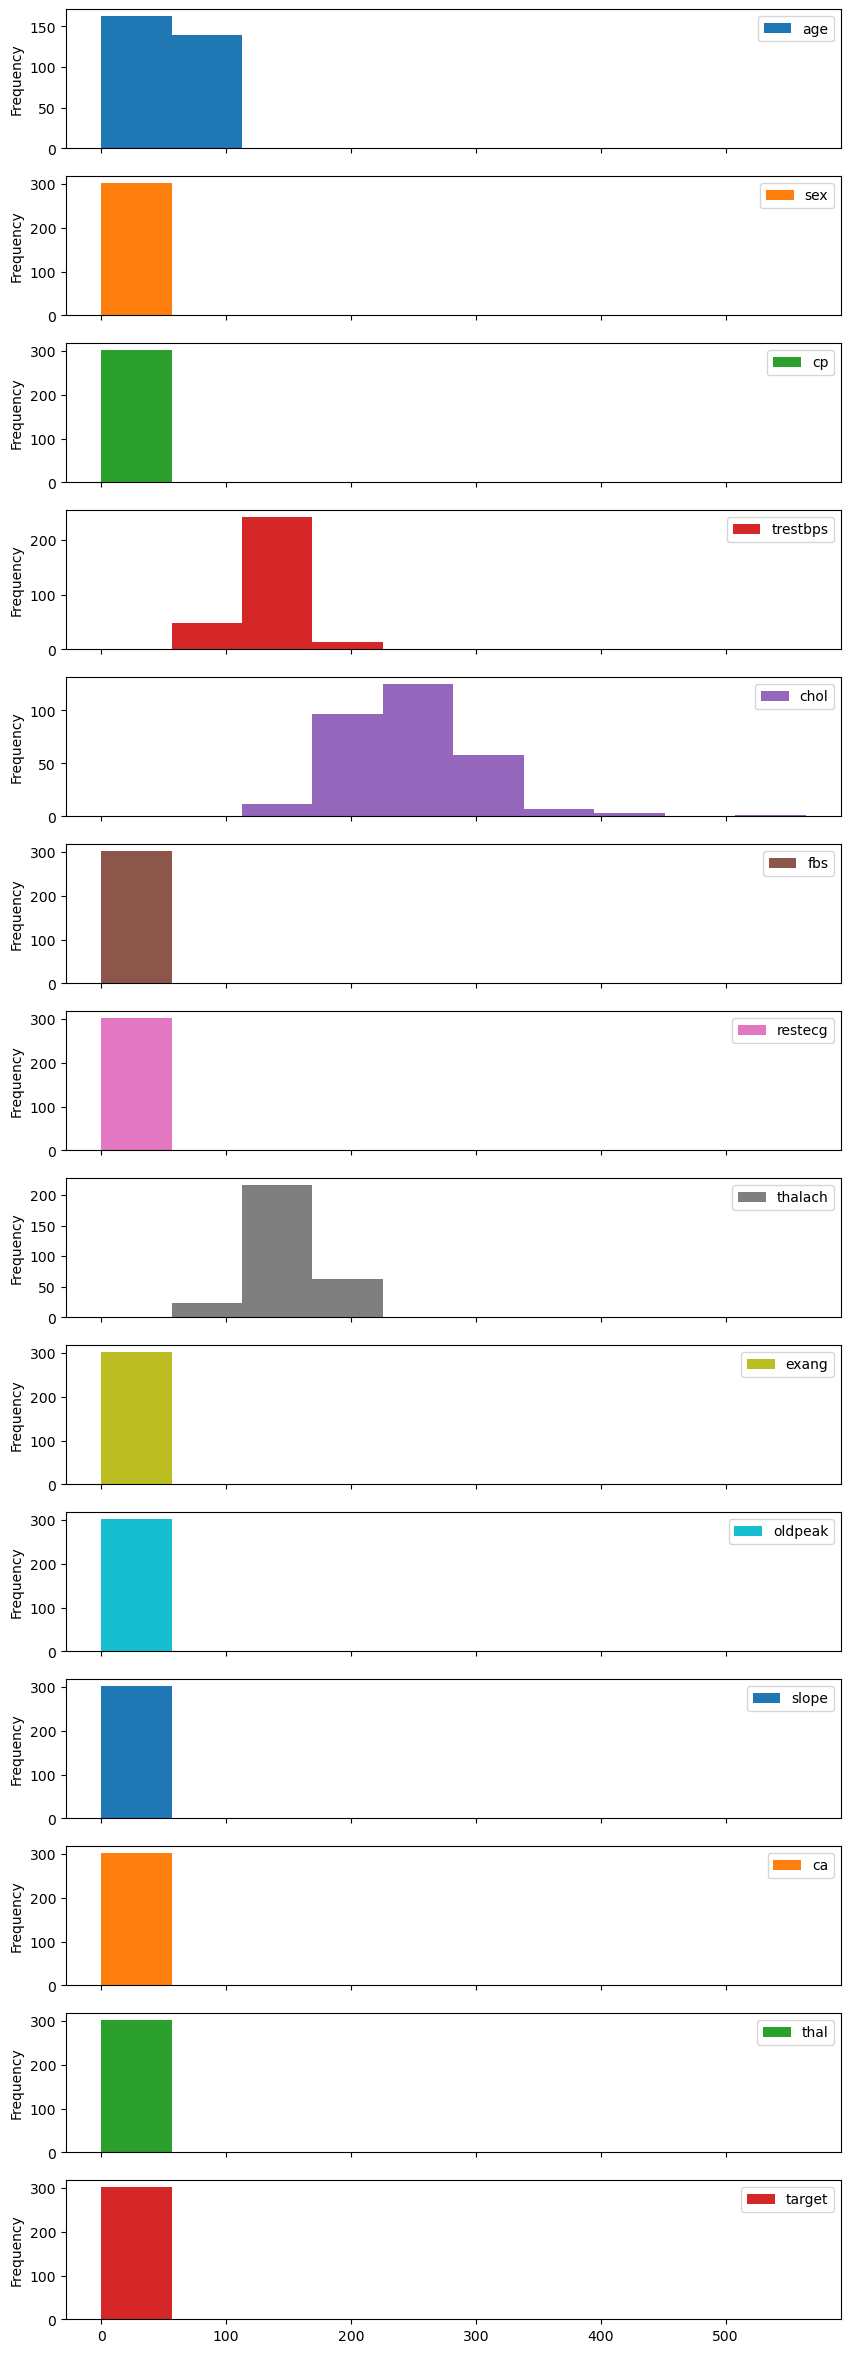

In [68]:
heart_disease.plot.hist(figsize=(10,30), subplots=True);

### Which one should you use? (pyplot vs matplotlib OO method?)

* When plotting something quickly, okay to use the pyplot method
* When plotting something more advanced, use the OO method

In [73]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [74]:
over_50 = heart_disease[heart_disease["age"] > 50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


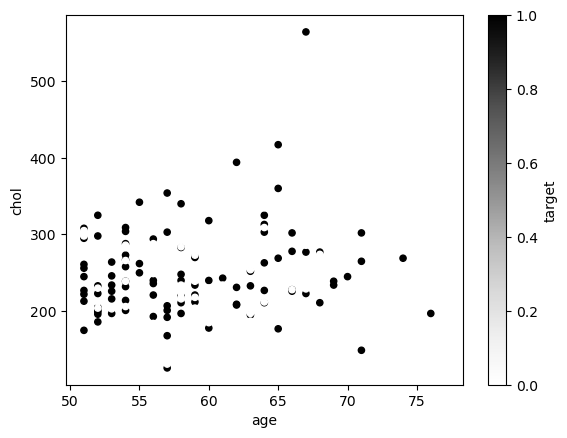

In [75]:
# Pyplot method
over_50.plot(kind="scatter",
             x="age",
            y="chol",
            c="target");

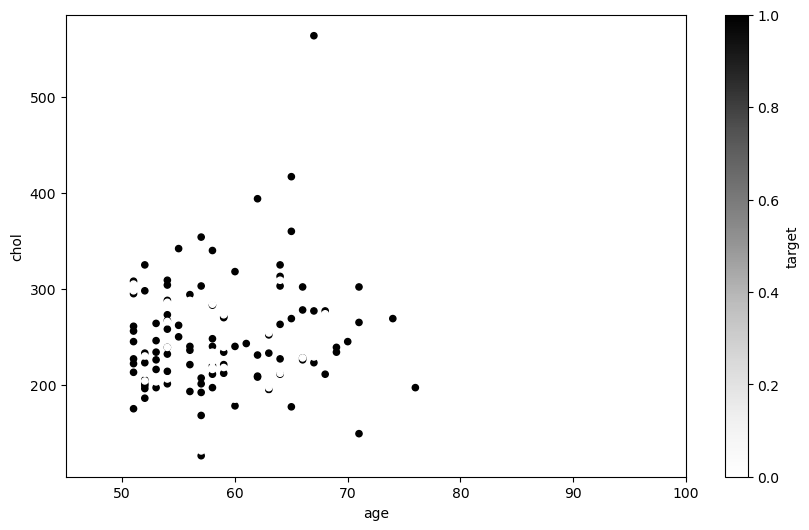

In [77]:
# OO method mixed with pyplot method
fig, ax = plt.subplots(figsize=(10,6))
over_50.plot(kind="scatter",
            x="age",
            y="chol",
            c="target",
            ax=ax);
ax.set_xlim([45,100]);

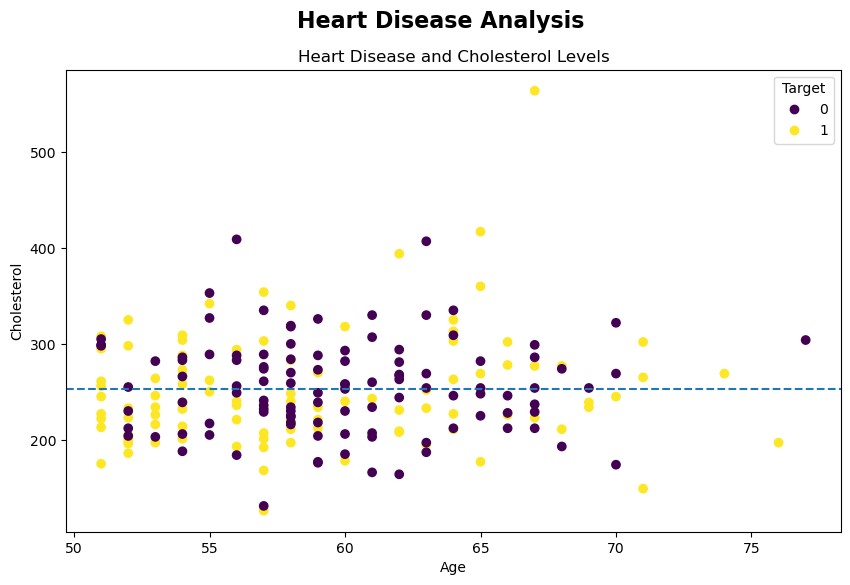

In [80]:
# OO method from scratch
fig, ax = plt.subplots(figsize=(10,6))

# Plot the data
scatter = ax.scatter(x=over_50["age"],
                    y=over_50["chol"],
                    c=over_50["target"])

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
      xlabel="Age",
      ylabel="Cholesterol") 

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target");

# Add a horizontal line
ax.axhline(over_50["chol"].mean(),
          linestyle="--");

# Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");


In [81]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


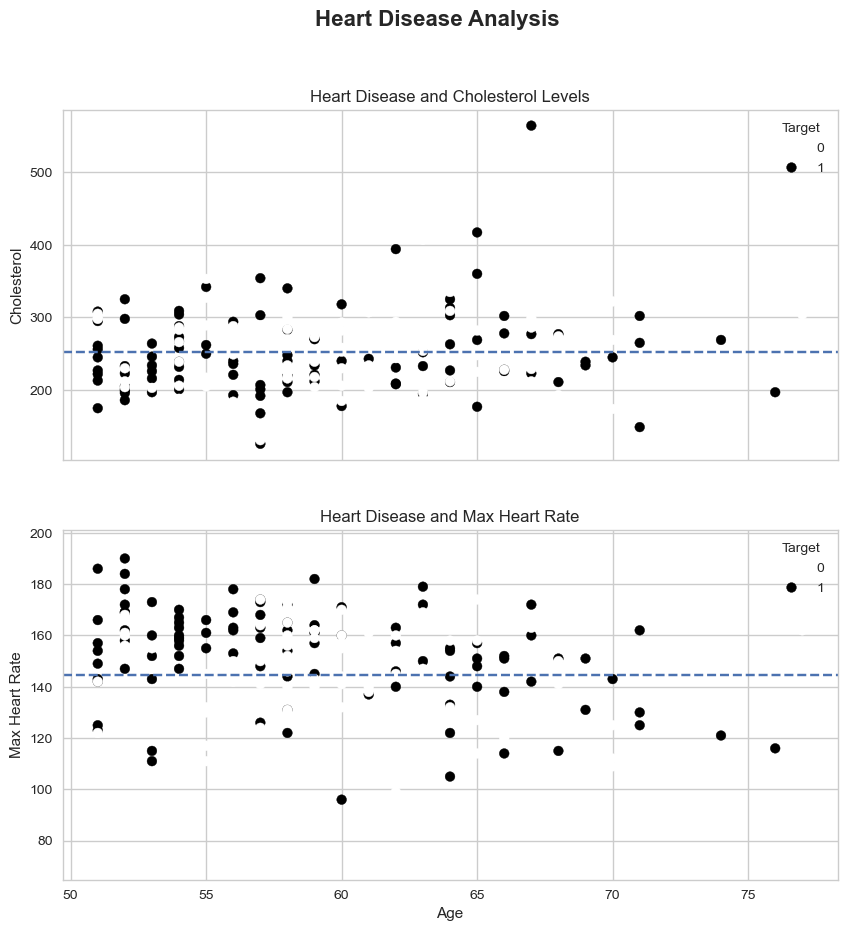

In [98]:
# Set the style
plt.style.use("seaborn-v0_8-whitegrid")

# Subplot of chol, age, thalach
fig, (ax0, ax1) = plt.subplots(nrows=2,
                              ncols=1,
                              figsize=(10,10),
                              sharex=True)

# Add data to ax0
scatter = ax0.scatter(x=over_50["age"],
              y=over_50["chol"],
              c=over_50["target"])

# Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels",
      ylabel="Cholesterol")

# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target")

# Add a meanline
ax0.axhline(y=over_50["chol"].mean(),
           linestyle="--");

# Add data to ax1
scatter = ax1.scatter(x=over_50["age"],
                     y=over_50["thalach"],
                     c=over_50["target"])

# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate",
       xlabel="Age",
       ylabel="Max Heart Rate")

# Add a legend to ax1
ax1.legend(*scatter.legend_elements(), title="Target")

# Add a meanline
ax1.axhline(y=over_50["thalach"].mean(),
           linestyle="--");

# Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");


## Customizing Matplotlib plots and getting stylish

In [87]:
## See the different styles available
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

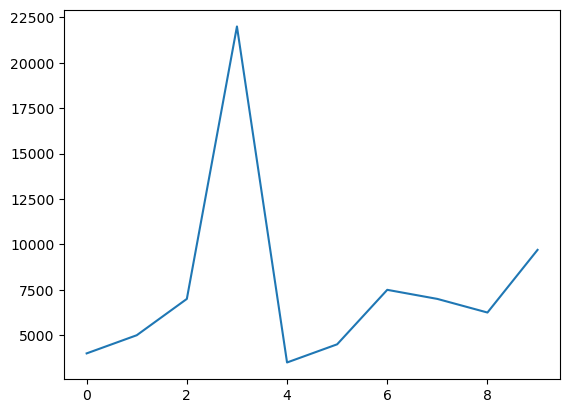

In [88]:
car_sales["Price"].plot();

In [90]:
plt.style.use("seaborn-v0_8-whitegrid")

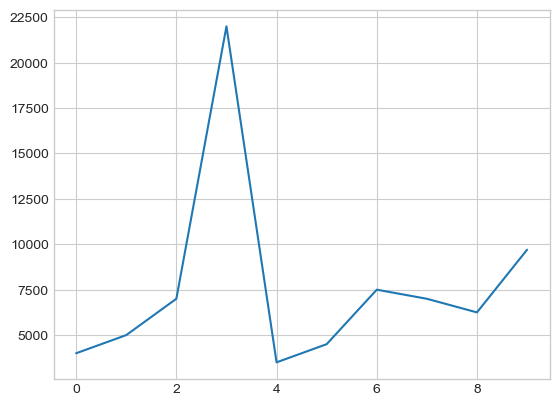

In [91]:
car_sales["Price"].plot();

In [92]:
plt.style.use("seaborn-v0_8")

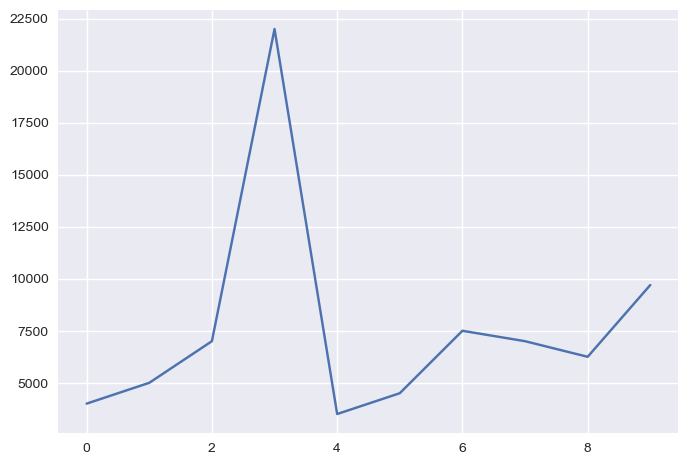

In [94]:
car_sales["Price"].plot();

In [95]:
# Create some data
x = np.random.randn(10,4)
x

array([[-1.74100291, -1.21177274,  0.70735859, -0.42525021],
       [-0.14498593, -0.59842488,  0.1018854 ,  1.11398617],
       [ 1.53439701,  0.19809451, -0.39154221, -0.69715709],
       [-0.35803002, -0.12904827, -0.40272655, -0.59579631],
       [-0.19268029,  0.664364  ,  2.09695902, -0.65591099],
       [ 0.28166167, -0.14294736, -0.27167395, -0.92599041],
       [ 0.39179922,  0.24176047, -0.24060344, -0.53686029],
       [ 0.22710096, -2.47385389,  1.33855763, -0.97836652],
       [ 0.95302659, -0.9556111 ,  0.77488416,  0.52275045],
       [-1.60411057,  0.98437195, -0.40077211, -1.74597486]])

In [96]:
df = pd.DataFrame(x, columns=["a","b","c","d"])
df

,a,b,c,d
0,-1.741003,-1.211773,0.707359,-0.425250
1,-0.144986,-0.598425,0.101885,1.113986
2,1.534397,0.198095,-0.391542,-0.697157
3,-0.358030,-0.129048,-0.402727,-0.595796
4,-0.192680,0.664364,2.096959,-0.655911
5,0.281662,-0.142947,-0.271674,-0.925990
6,0.391799,0.241760,-0.240603,-0.536860
7,0.227101,-2.473854,1.338558,-0.978367
8,0.953027,-0.955611,0.774884,0.522750
9,-1.604111,0.984372,-0.400772,-1.745975


matplotlib.axes._axes.Axes

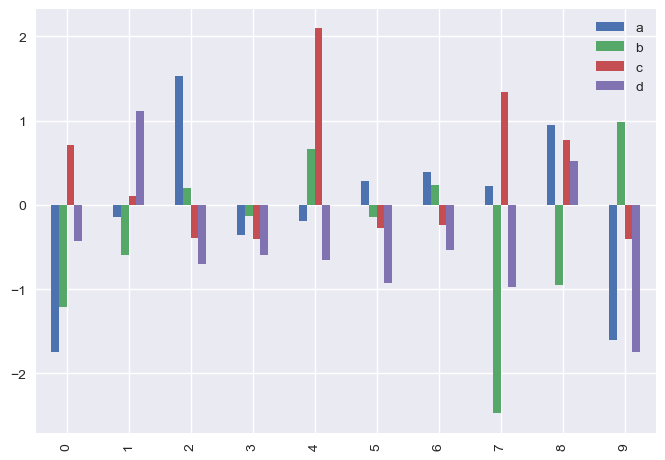

In [97]:
ax = df.plot(kind="bar");
type(ax)

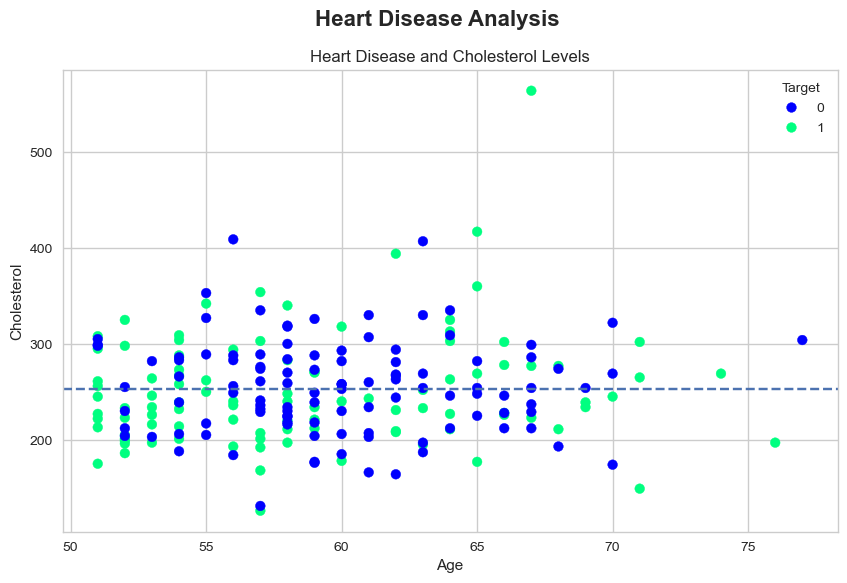

In [100]:
plt.style.use("seaborn-v0_8-whitegrid")

# OO method from scratch
fig, ax = plt.subplots(figsize=(10,6))

# Plot the data
scatter = ax.scatter(x=over_50["age"],
                    y=over_50["chol"],
                    c=over_50["target"],
                    cmap="winter") # this changes the color scheme

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
      xlabel="Age",
      ylabel="Cholesterol") 

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target");

# Add a horizontal line
ax.axhline(over_50["chol"].mean(),
          linestyle="--");

# Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");


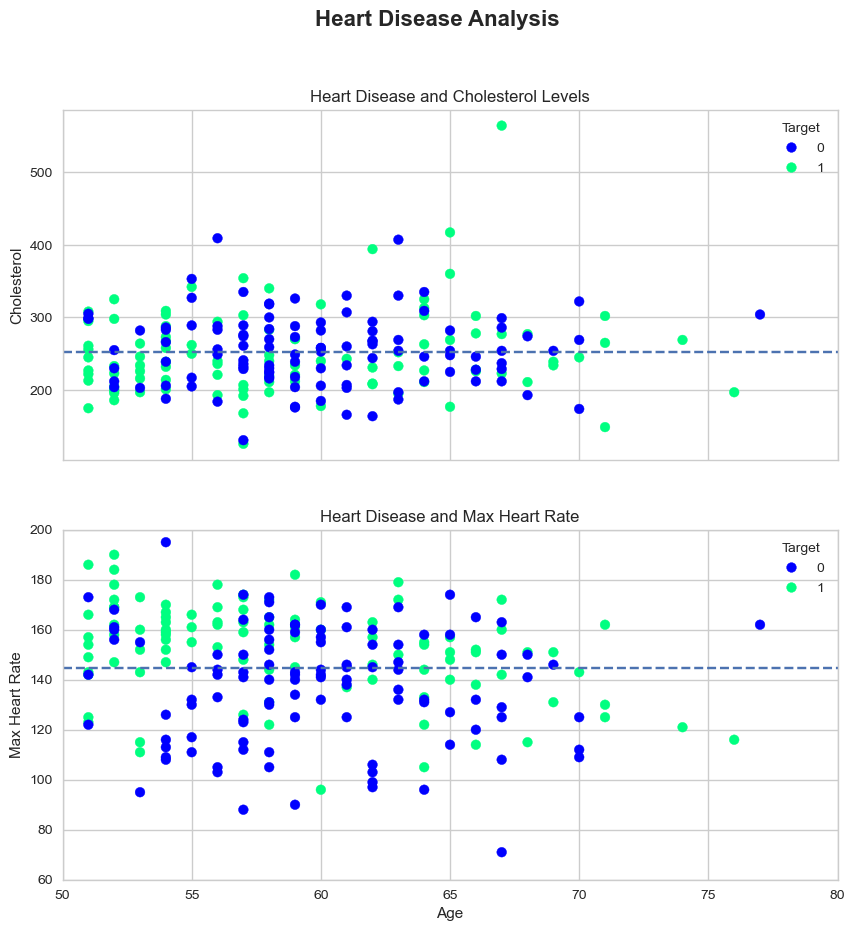

In [106]:
# # Set the style
# plt.style.use("seaborn-v0_8-whitegrid")

# Subplot of chol, age, thalach
fig, (ax0, ax1) = plt.subplots(nrows=2,
                              ncols=1,
                              figsize=(10,10),
                              sharex=True)

# Add data to ax0
scatter = ax0.scatter(x=over_50["age"],
              y=over_50["chol"],
              c=over_50["target"],
              cmap="winter")

# Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels",
      ylabel="Cholesterol")

# Change the x axis limits
ax0.set_xlim([50,80])

# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target")

# Add a meanline
ax0.axhline(y=over_50["chol"].mean(),
           linestyle="--");

# Add data to ax1
scatter = ax1.scatter(x=over_50["age"],
                     y=over_50["thalach"],
                     c=over_50["target"],
                     cmap="winter")

# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate",
       xlabel="Age",
       ylabel="Max Heart Rate")

# Change the x axis limits
ax1.set_xlim([50,80])
ax1.set_ylim([60,200])

# Add a legend to ax1
ax1.legend(*scatter.legend_elements(), title="Target")

# Add a meanline
ax1.axhline(y=over_50["thalach"].mean(),
           linestyle="--");

# Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");

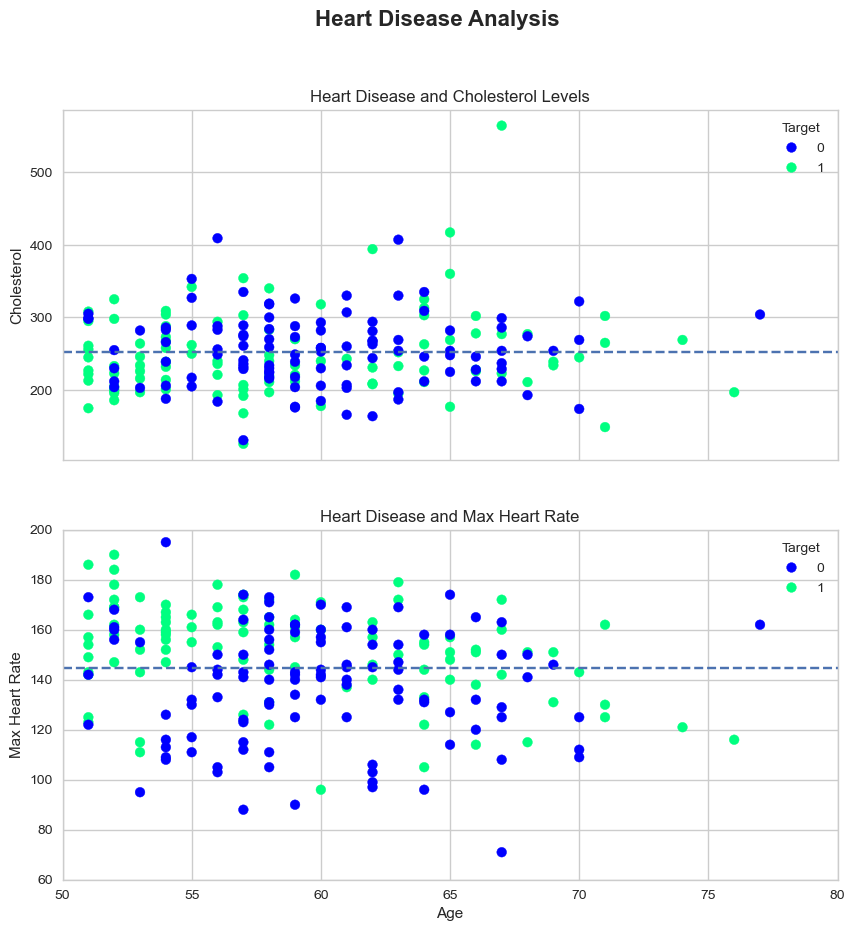

In [107]:
fig

In [108]:
fig.savefig("images/heart-disease-analysis-plot.png")